# Data Preprocessing

Начнем работу с небольшого описания данных. Исходный датасет имеет 4 переменные. Независимые: направление ветра (Wind_direction), давление (Pressure), влажность (Humidity); зависимая прогнозируемая переменная - температура.
Для дальнейшего удобства работы я изменила в файле Excel очередность переменных, переместив результирующую переменную в конец таблицы. Избавилась от лишних значений в названиях переменных,переконвертировала файл в формат csv.

На первом этапе осуществим подготовку данных. Сперва импортируем необходимые библиотеки, вторым шагом загрузим файл с данными в формате csv.

In [308]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [309]:
# Importing the dataset
df = pd.read_csv('kr1_gavr.csv', sep=',')

Для наглядности выведем импортрованнные данные на экран; убедимся, что всё загрузилось должным образом. Имеем 4 столбца, 2831 строку.

In [310]:
df

,Wind_direction,Pressure,Humidity,Temperature
0,101.0,885.9,65.4,1.3
1,98.1,885.7,67.2,1.3
2,99.8,885.6,68.1,1.2
3,102.4,885.5,68.8,1.2
4,102.8,885.3,70.1,1.2
...,...,...,...,...
2826,105.2,878.6,99.3,-7.3
2827,94.0,878.5,99.3,-7.3
2828,100.7,878.4,99.3,-7.2
2829,94.3,878.3,99.3,-7.2


Построим графики распределения функций. Для асимметричных данных проведем логарифмирование: 'Wind_direction','Pressure',"Humidity".

C:\Users\User\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


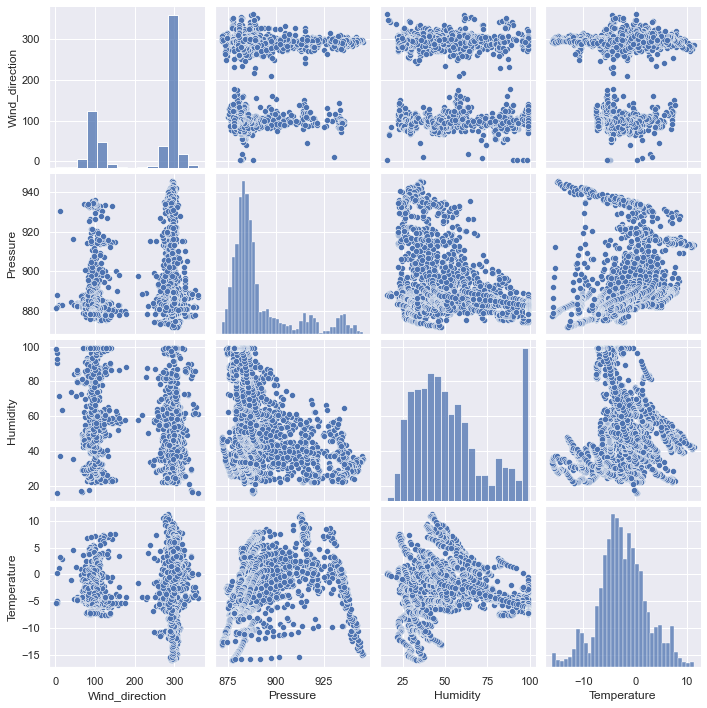

In [311]:
# Features distribution
import seaborn as sns
sns.set()
sns.pairplot(df, size = 2.5)
plt.show();

Произведем преобразование для искаженных распределений и продемонстрируем результат.

C:\Users\User\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


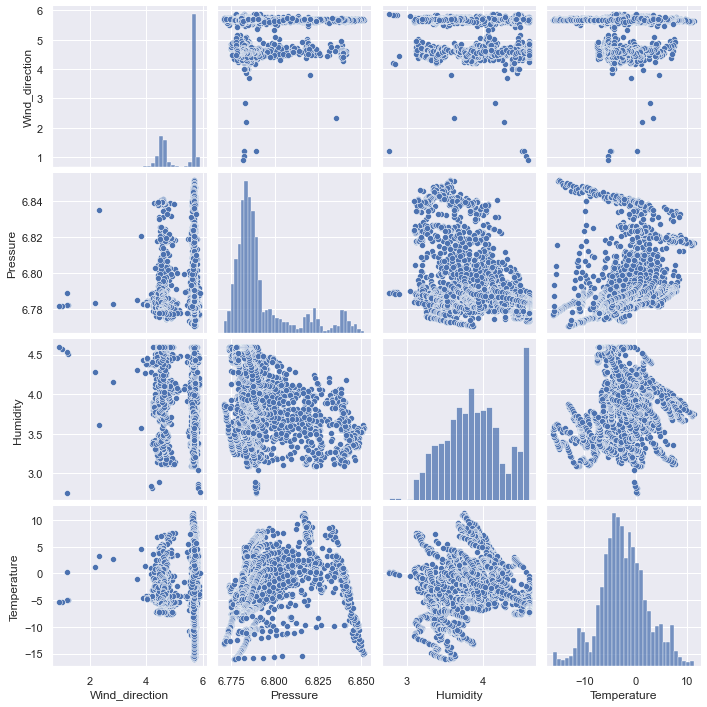

In [312]:
# Log Transformations for Skewed Distributions
df_1 = df.copy()
df_1[['Wind_direction','Pressure',"Humidity"]] = np.log(df_1[['Wind_direction','Pressure',"Humidity"]])
sns.set()
sns.pairplot(df_1, size = 2.5)
plt.show();

Выведем статистику по числовым переменным, где сразу увидим, что в переменных отсутствуют пропущенные значения.

In [313]:
df.describe()

,Wind_direction,Pressure,Humidity,Temperature
count,2831.000000,2831.000000,2831.000000,2831.000000
mean,229.394454,891.851183,54.486047,-2.390533
std,94.424358,16.664751,22.622350,4.740167
min,2.500000,871.900000,15.800000,-16.000000
25%,108.500000,881.750000,37.100000,-5.100000
50%,289.700000,885.500000,48.800000,-2.700000
75%,298.400000,894.300000,65.700000,0.400000
max,359.900000,945.500000,99.400000,11.300000


Осуществим работы с выбросами в числовых переменных: для этого запишем функцию для поиска и замены данных, выходящих за пределы 3 сигма. 

In [314]:
# Function Outliers
def outliers(df):
    num_var = list(df._get_numeric_data().columns)
    for col_names in num_var:
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()-3*df[col_names].std() 
                            if y < df[col_names].mean()-3*df[col_names].std() else y)
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()+3*df[col_names].std() 
                            if y > df[col_names].mean()+3*df[col_names].std() else y)
    return(df)

Запишем в наш датафрейм уже очищенные от  выбросов переменные и повторно выведем статистику.
В результате выполнения очистки можно наблядать, что показатели максимального, минимального, среднего значений, а также стандартного отклонения не изменились и соответствуют нормальному распределению, что говорит об отсутствии выбросов.

In [315]:
# Outliers
df = outliers(df)
df.describe()

,Wind_direction,Pressure,Humidity,Temperature
count,2831.000000,2831.000000,2831.000000,2831.000000
mean,229.394454,891.843566,54.486047,-2.390533
std,94.424358,16.641338,22.622350,4.740167
min,2.500000,871.900000,15.800000,-16.000000
25%,108.500000,881.750000,37.100000,-5.100000
50%,289.700000,885.500000,48.800000,-2.700000
75%,298.400000,894.300000,65.700000,0.400000
max,359.900000,941.845438,99.400000,11.300000


Проведем проверку типов данных по переменным и выявим соответствие.

In [316]:
df.dtypes

Wind_direction    float64
Pressure          float64
Humidity          float64
Temperature       float64
dtype: object

Следующим этапом подготовки данных будет проверка на наличие пропущенных значений.
Выведем общее количество и процент пропусков по переменным. Как было указано ранее, исходя из статистики, пропуски отсутствуют.

In [317]:
# Cheking Missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Temperature,0,0.0
Humidity,0,0.0
Pressure,0,0.0
Wind_direction,0,0.0


Имеем подгоовленный набор данных, который можно далее использовать для моделирования.

# Linear Regression

Следующий этап: построение многофакторной линейной регрессии. Построим корреляционную матрицу для визуализации и выявления наиболее значимых факторов, которые необходимо будет включить в модель.
Как можно определить изначально, большее влияние имеет переменная Humidity, далее Pressure и далее Wind_direction.

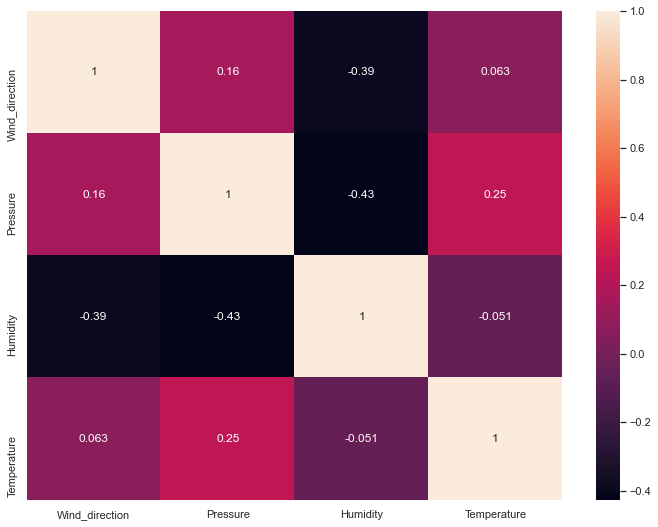

In [318]:
# Cheking correlations
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

Поделим выборку на обучающую и тестовую (20%), запишем разделенные данные.

In [319]:
# Splitting the dataset into the Training set and Test set
X = df.iloc[:, :-1].values
y = df.iloc[:, 3].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

Построим модель многофакторной регрессии от всех переменных, включив константу, и выведем статистику по ней.

In [320]:
# Multiple Linear Regression, checking p-values
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
X = sm.add_constant(X_train)
mr1 = sm.OLS(y_train, X).fit()
#mr1.pvalues
mr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     53.86
Date:                Tue, 03 Nov 2020   Prob (F-statistic):           1.27e-33
Time:                        15:05:44   Log-Likelihood:                -6645.2
No. Observations:                2264   AIC:                         1.330e+04
Df Residuals:                    2260   BIC:                         1.332e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -74.2140      5.872    -12.639      0.000     -85.729     -62.699
x1             0.0031      0.001      2.789      0.005       0.001       0.005
x2             0.0786      0.006     12.200      0.000       0.066       0.091
x3             0.0189      0.005      3.765      0.000       0.009       0.029
==============================================================================
Omnibus:                       36.008   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.886
Skew:                          -0.196   Prob(JB):                     2.42e-11
Kurtosis:                       3.604   Cond. No.                     5.65e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.65e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Как показала статистика, все переменные модели оказались значимыми. Коэффициент детерминации низкий, однако модель значимая.
Были поведены модификации исходной модели путем исключения/добавления факторов, однако диапазон изменения среднеквадратической ошибки был крайне незначительным, а значение R^2 только сокращалось. Поэтому было принято решение включить в окончательный вариант многофакторной регрессии все переменные.

Повторно строим оптимальную модель, выбирая все факторы. (этот кусочек кода можно было не писать, ноонприменялся для эксперементов с вариантами переменных, поэтому я решила его оставить).

In [321]:
X_train = X_train[:, [0, 1, 2]]
X_test = X_test[:,[0, 1 ,2] ]

In [322]:
# Fitting Optimized Multiple Regression to the Training set
from sklearn.linear_model import LinearRegression
mr = LinearRegression().fit(X_train, y_train)

Получаем коэффициенты регрессии

In [323]:
# Getting parameters
mr.coef_, mr.intercept_

(array([0.00310027, 0.0785546 , 0.01894551]), -74.21403228653188)

Строим прогноз на тестовых значениях:

In [324]:
# Predicting the Test set results
y_pred = mr.predict(X_test)

Вычисляем коэффициент детерминации, видим, что на тестовых значениях он немного ниже.

In [325]:
# Coefficient of determination R^2
mr.score(X_train, y_train), mr.score(X_test, y_test)

(0.06672450453128886, 0.06488746859269645)

Находим среднеквадратическое отклонение, которое на тестовых значениях слегка превышает, сто говорит о том, что модель слегка переобучилась.

In [326]:
# Mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, mr.predict(X_train)), mean_squared_error(y_test, y_pred)

(20.747293672272125, 21.83569050055639)

Строим график по наиболее значимой переменной для визуализации результата. Видим, что предсказание работает не наилучшим образом, однако и не наихудшим образом.

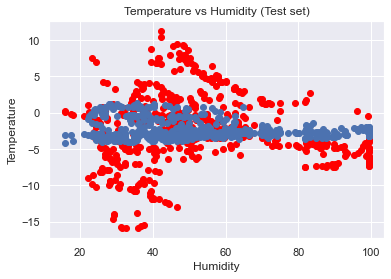

In [327]:
# Visualising the Test set results
plt.scatter(X_test[:,2], y_test, color = 'red')
plt.plot(X_test[:,2], mr.predict(X_test), 'bo')
plt.title('Temperature vs Humidity (Test set)')
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.show()

Итак, мы получили базовую модель, от которой мы будем отталкиваться и ориентирваться в ходе посроения модели нейроной сети.
"Законсервируем" данные, полученные на данном этапе.

In [328]:
import pickle
obj = {'X_train': X_train, 'X_test': X_test,'y_train': y_train,'y_test': y_test}
output = open('kr1_reg.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()

# Regression Neural Network

Импортируем подготовленные данные из сохраненого файла и помещяем в переменные соответствующие записи.

In [329]:
# Importing prepared dataset
import pickle
input = open('kr1_reg.pkl', 'rb')
obj = pickle.load(input)
input.close()
X_train = obj["X_train"]
X_test = obj["X_test"]
y_train = obj["y_train"]
y_test = obj["y_test"]

Произведем шкалирование данных, использя выборку train оценим параметры, затем преобразуем обучающую и тестовую выборки.

In [330]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler().fit(np.array([[i] for i in y_train]))
y_train = sc_y.transform(np.array([[i] for i in y_train]))
y_test = sc_y.transform(np.array([[i] for i in y_test]))

Подключим библиотеки, необходимые для работы с нейронными сетями.

In [331]:
# Install Tensorflow
# Install Keras
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

Создаем последовательную нейронную сеть: 
Добавляем к ней слои, размерность входного слоя равна 3 (в соответствии с переменными предыдущеймодели), число нейронов на выходном слое задаем равным 6, так как модель расширяющаяся, функция активации на первом слое-гиперболический тангенс.
На втором слое количество нейронов оставляем равным 6, та же функция активации.
На последнем слое используем линейную функцию активации.

In [332]:
# Initialising the ANN
rnn = Sequential()

# Adding the input layer and the first hidden layer
rnn.add(Dense(output_dim = 6, activation = 'tanh', input_dim = 3))

# Adding the second hidden layer
rnn.add(Dense(output_dim = 6, activation = 'tanh'))

# Adding the output layer
rnn.add(Dense(output_dim = 1, activation = 'linear'))

# Compiling the ANN
rnn.compile(optimizer='adam', loss='mean_squared_error', metrics = ['accuracy'])

C:\Users\User\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="tanh", input_dim=3, units=6)`
  """
C:\Users\User\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="tanh", units=6)`
  
C:\Users\User\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1)`
  # This is added back by InteractiveShellApp.init_path()


Обучаем модель партиями по 10 объектов в течении 100 эпох.

In [333]:
# Fitting the ANN to the Training set
rnn.fit(X_train, y_train, batch_size = 10, nb_epoch = 100)

C:\Users\User\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/100
2264/2264 [==============================] - 1s 435us/step - loss: 0.9830 - accuracy: 0.0000e+00
Epoch 2/100
2264/2264 [==============================] - 1s 348us/step - loss: 0.8528 - accuracy: 0.0000e+00
Epoch 3/100
2264/2264 [==============================] - 1s 358us/step - loss: 0.8012 - accuracy: 0.0000e+00
Epoch 4/100
2264/2264 [==============================] - 1s 270us/step - loss: 0.7572 - accuracy: 0.0000e+00
Epoch 5/100
2264/2264 [==============================] - 1s 279us/step - loss: 0.7115 - accuracy: 0.0000e+00
Epoch 6/100
2264/2264 [==============================] - 0s 193us/step - loss: 0.6684 - accuracy: 0.0000e+00
Epoch 7/100
2264/2264 [==============================] - 0s 178us/step - loss: 0.6384 - accuracy: 0.0000e+00
Epoch 8/100
2264/2264 [==============================] - 1s 243us/step - loss: 0.6070 - accuracy: 0.0000e+00
Epoch 9/100
2264/2264 [==============================] - 1s 265us/step - loss: 0.5839 - accuracy: 0.0000e+00
Epoch 10/100
2264/2

2264/2264 [==============================] - 0s 212us/step - loss: 0.4240 - accuracy: 0.0000e+00
Epoch 76/100
2264/2264 [==============================] - 0s 206us/step - loss: 0.4217 - accuracy: 0.0000e+00
Epoch 77/100
2264/2264 [==============================] - 0s 211us/step - loss: 0.4215 - accuracy: 0.0000e+00
Epoch 78/100
2264/2264 [==============================] - 0s 195us/step - loss: 0.4167 - accuracy: 0.0000e+00
Epoch 79/100
2264/2264 [==============================] - 0s 189us/step - loss: 0.4190 - accuracy: 0.0000e+00
Epoch 80/100
2264/2264 [==============================] - 0s 182us/step - loss: 0.4186 - accuracy: 0.0000e+00
Epoch 81/100
2264/2264 [==============================] - 0s 191us/step - loss: 0.4175 - accuracy: 0.0000e+00
Epoch 82/100
2264/2264 [==============================] - 0s 186us/step - loss: 0.4172 - accuracy: 0.0000e+000s - loss: 0.4047 - accura
Epoch 83/100
2264/2264 [==============================] - 0s 198us/step - loss: 0.4158 - accuracy: 0.0000e+

Строим прогноз на тестовом множестве.

In [334]:
# Predicting the Test set results
y_pred = rnn.predict(X_test)

Осуществляем обратное шкалирование

In [335]:
# Inversing scaling
#yhat = pd.DataFrame(yhat, columns=['yhat']) 
from sklearn.preprocessing import StandardScaler
y_hat = sc_y.inverse_transform(y_pred)
y_test = sc_y.inverse_transform(y_test)
X_test = sc_X.inverse_transform(X_test)

Вычмслим сумму квадратов ошибок на тестовом множестве.

In [336]:
# Mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_hat)

10.618722205262607

Видим, что MSE в модели нейронной сети (10.618722205262607) значительно сократилась по сравнения с моделью регрессии (21.83569050055639).

Построим график, на котором видно, что построенная модель нейронной сети сработала довольно четко по сравнению с многофакторной регрессией.

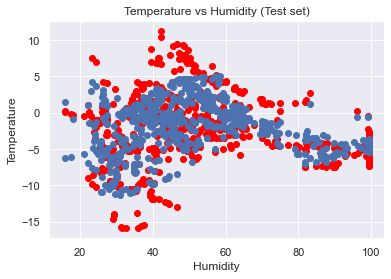

In [272]:
# Visualising the Test set results
plt.scatter(X_test[:,2], y_test, color = 'red')
plt.plot(X_test[:,2], y_hat, 'bo')
plt.title('Temperature vs Humidity (Test set)')
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.show()

В итоге имеет качественный результат, который во много раз лучше базовой модели.